In [1]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
ulam_df = pd.read_csv('./data_collection/ulam.csv', sep=',', index_col=0)
print('ulam_df.shape: {}'.format(ulam_df.shape))

ulam_df.shape: (91, 2)


In [3]:
# check dataframe info
ulam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ulam_titles  91 non-null     object
 1   ingredients  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [4]:
# check few random sample
ulam_df.sample(10)

,ulam_titles,ingredients
89,Lechon,"['PORK', 'ONION', 'GARLIC', 'LEMONGRASS', 'BAY..."
56,Pinakbet,"['PORK', 'SHRIMP PASTE', 'PUMPKIN', 'SWEET POT..."
16,Brazo de Mercedes,"['EGGS', 'VANILLA', 'CONDENSED MILK', 'SUGAR',..."
31,Maruya,"['BANANAS', 'EGGS', 'FLOUR', 'BAKING POWDER']"
65,Pichi-pichi,"['CASSAVA', 'SUGAR', 'COCONUT', 'CHEESE']"
54,Bicol Express,"['PORK', 'COCONUT CREAM', 'SHRIMP PASTE', 'HOT..."
79,Torta,"['EGGS', 'BEEF', 'ONION', 'POTATOES', 'EGGPLAN..."
23,Daing na bangus,"['BANGUS', 'VINEGAR', 'GARLIC', 'CAYENNE PEPPE..."
44,Gulaman,"['GELATIN', 'VANILLA', 'CONDENSED MILK']"
40,Afritada,"['CHICKEN', 'TOMATO SAUCE', 'POTATOES', 'BELL ..."


In [5]:
# compute basic ulam_titles descriptive stats
ulam_df['ulam_titles'].describe()

count                91
unique               91
top       Nilagang baka
freq                  1
Name: ulam_titles, dtype: object

In [6]:
# remove the "OR\n" to some ingredients and convert the ingredients 
# list to a single string where each ingredient are separated by the symbol '|'
def remove_or_slash_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    ingredients_cleaned = [ingredient.split(r'OR\n')[-1].lower().strip() for ingredient in list(ingredients)]
    return '|'.join(ingredients_cleaned)
ulam_df['ingredients'] = ulam_df['ingredients'].apply(remove_or_slash_n)

In [7]:
# check few random sample
ulam_df.sample(10)

,ulam_titles,ingredients
5,Bukayo,coconut|sugar
9,Inihaw na liempo,pork|soy sauce|lime|salt|black pepper|garlic
84,Kaldereta,beef|goat|tomato sauce|potatoes|carrot|onion|b...
1,Talunan,chicken|vinegar|ginger|garlic|fish sauce|black...
39,Morcon,pork|beef|sausage|carrot|pickled cucumbers|eggs
21,Latik,coconut milk|coconut cream|sugar
32,Cascaron,rice flour|coconut|coconut milk|sugar
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot
6,Papaitan,offal|onion|ginger|garlic|black pepper|salt|tl...
79,Torta,eggs|beef|onion|potatoes|eggplant|tomato


In [8]:
# compute total ingredients per dish (ulam)
ulam_df['num_ingredients'] = ulam_df['ingredients'].apply(lambda ing: len(ing.split('|')))
ulam_df.sort_values(by='num_ingredients', ascending=False)

,ulam_titles,ingredients,num_ingredients
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,15
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...,14
50,Batchoy,noodles|stock|pork|bone marrow|offal|eggs|chic...,13
56,Pinakbet,pork|shrimp paste|pumpkin|sweet potato|eggplan...,13
17,Giniling,beef|bell pepper|olive oil|garlic|onion|olives...,12
...,...,...,...
12,Banana Cue,bananas|sugar,2
46,Proben,offal|cornstarch,2
5,Bukayo,coconut|sugar,2
24,Tortang talong,eggplant|eggs,2


Text(0.5, 0, 'num_ingredients')

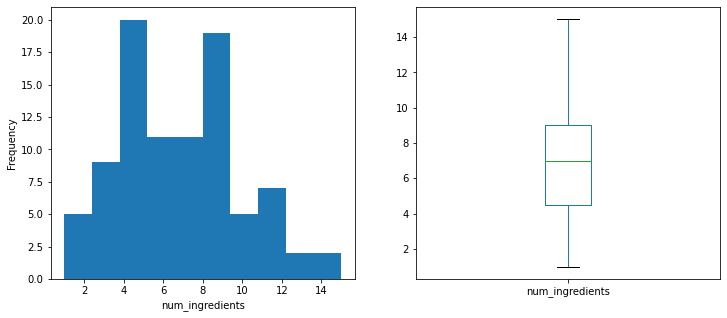

In [9]:
# view distribution of num_ingredients
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ulam_df['num_ingredients'].plot(kind='hist', ax=axes[0])
ulam_df['num_ingredients'].plot(kind='box', ax=axes[1], xlabel='')
axes[0].set_xlabel('num_ingredients')

In [10]:
# compute basic descriptive stats for number of ingredients
ulam_df['num_ingredients'].describe()

count    91.000000
mean      6.747253
std       2.994786
min       1.000000
25%       4.500000
50%       7.000000
75%       9.000000
max      15.000000
Name: num_ingredients, dtype: float64

In [11]:
# check dish with only 1 ingredient
ulam_df[ulam_df.num_ingredients == 1]

,ulam_titles,ingredients,num_ingredients
86,Lumpia,lumpiang shanghai,1


In [12]:
# remove lumpia record as its ingredients is a lumpia variant
ulam_df.drop([86], inplace=True)

In [13]:
# represent ingredients data as bag-of-words
from sklearn.feature_extraction.text import CountVectorizer 

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 130


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'pancit batil patong',
 'pancit bihon',
 'pancit canton',
 'panci

In [14]:
# look for ulam (dish) that has pancit in its ingredients or in its ulam title
def look_for_pancit(ulam):
    return 'pancit' in ulam.ulam_titles.lower() or 'pancit' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_pancit, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,7
36,Pancit malabon,noodles|pork|shrimps|fish sauce|cabbage|chicha...,9
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot,6
52,Pancit palabok,noodles|shrimps|fish sauce|eggs|chicharrón|sca...,8
77,Pancit canton,noodles|pork|beef|seafood|soy sauce|carrot|oni...,9
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...,8


In [15]:
# drop Pancit record as its ingredients are Pancit variants
ulam_df.drop([90], inplace=True)

In [16]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 122


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled

In [17]:
# look for ulam titles that has 'tapa (philippines)' as one of its ingredients
mask = ulam_df['ingredients'].apply(lambda ings: 'tapa (philippines)' in ings.split('|'))
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
49,Tapsilog,tapa (philippines)|eggs|rice|garlic,4
78,Silog,rice|eggs|garlic|tapa (philippines)|hot dog|to...,9


In [18]:
# drop Tapsilog record, leaving Silog as the general dish/ulam with silog related ingredients 
ulam_df.drop([49], inplace=True)

In [19]:
# look for ulam (dish) that has 'leche flan' in its ingredients or in its ulam title
def look_for_leche_flan(ulam):
    return 'leche flan' in ulam.ulam_titles.lower() or 'leche flan' in ulam.ingredients
mask = ulam_df[['ulam_titles', 'ingredients']].apply(look_for_leche_flan, axis=1)
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
76,Halo-Halo,ice cream|leche flan|milk|bananas|durian|mung ...,10
80,Leche Flan,eggs|milk|condensed milk|sugar|vanilla,5


In [20]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 122


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled

In [21]:
# convert the bag-of-words ingredients data to dataframe
bow = cv.transform(ulam_df['ingredients'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names(), index=ulam_df['ulam_titles'])
bow_df.head()

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,white wine vinegar,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
Adobong manok,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Talunan,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Kilawin,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Filipino Spaghetti,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tokneneng,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# compute top-50 common ingredients
common_ingredients = bow_df.sum().sort_values(ascending=False)
common_ingredients.head(50)

garlic                         35
salt                           31
pork                           30
onion                          30
sugar                          27
black pepper                   22
eggs                           18
chicken                        18
beef                           17
ginger                         15
fish sauce                     14
soy sauce                      14
carrot                         13
vinegar                        13
coconut milk                   10
rice flour                      9
coconut                         9
tomato                          9
peppercorns                     8
potatoes                        8
tlaola serrano chili pepper     8
bell pepper                     8
eggplant                        7
condensed milk                  7
offal                           7
noodles                         7
cabbage                         7
green beans                     6
bay leaf                        6
vanilla       

In [23]:
df = pd.read_csv('data_collection/ulam.csv', sep=',', index_col=0)
df.sample(10)

,ulam_titles,ingredients
52,Pancit palabok,"['NOODLES', 'SHRIMPS', 'FISH SAUCE', 'EGGS', '..."
29,Espasol,"['RICE FLOUR', 'COCONUT', 'COCONUT MILK']"
85,Kare-kare,"['OR\nPORK', 'OR\nOXTAIL', 'OR\nCHICKEN', 'GOA..."
13,Maja blanca,"['COCONUT MILK', 'CORNSTARCH', 'CORN', 'CHEESE..."
60,Pares,"['BEEF', 'SOY SAUCE', 'STAR ANISE', 'GINGER', ..."
34,Pancit lomi,"['NOODLES', 'OR\nCHICKEN', 'OR\nPORK', 'OFFAL'..."
47,Pancit bihon,"['OR\nPORK', 'CHICKEN', 'NOODLES', 'SOY SAUCE'..."
26,Kutsinta,"['RICE FLOUR', 'SUGAR', 'LYE WATER', 'ANNATTO ..."
44,Gulaman,"['GELATIN', 'VANILLA', 'CONDENSED MILK']"
77,Pancit canton,"['NOODLES', 'OR\nPORK', 'OR\nBEEF', 'SEAFOOD',..."


In [24]:
def look_for_slash_or_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    for ingredient in ingredients:
        if r'OR\n' in ingredient:
            return True
    return False

mask = df.ingredients.apply(look_for_slash_or_n)
ulam_with_ingredient_variants = df[mask]
ulam_with_ingredient_variants

,ulam_titles,ingredients
2,Kilawin,"['OR\nPORK', 'SEAFOOD', 'VINEGAR', 'CITRUS FRU..."
7,Lauya,"['OR\nCHICKEN', 'OR\nPORK', 'BEEF', 'CABBAGE',..."
10,Bistek Tagalog,"['BEEF', 'OR\nLIME', 'LEMON', 'ONION', 'GARLIC..."
14,Binagoongan,"['OR\nPORK', 'OR\nCHICKEN', 'BEEF', 'SHRIMP PA..."
16,Brazo de Mercedes,"['EGGS', 'VANILLA', 'CONDENSED MILK', 'SUGAR',..."
19,Ube halaya,"['YAM', 'OR\nMILK', 'OR\nCOCONUT MILK', 'CONDE..."
20,Pochero,"['OR\nBEEF', 'OR\nPORK', 'CHICKEN', 'TOMATO', ..."
25,Sinigang na hipon,"['SHRIMPS', 'TAMARIND', 'TOMATO', 'ONION', 'WA..."
28,Lumpiang Shanghai,"['OR\nPORK', 'BEEF', 'CARROT', 'ONION', 'SALT'..."
34,Pancit lomi,"['NOODLES', 'OR\nCHICKEN', 'OR\nPORK', 'OFFAL'..."


In [25]:
def get_ingredient_variants(ingredients):
    ingredient_variants = []
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    previous = False
    for ingredient in ingredients:
        if r'OR\n' in ingredient:
            ingredient_variants.append(ingredient.split(r'OR\n')[-1])
            previous = True
        elif previous:
            ingredient_variants.append(ingredient)
            previous = False
            
    return ingredient_variants

ulam_ingredients = ulam_with_ingredient_variants.ingredients.values
ingredient_variants = []
for ingredients in ulam_ingredients:
    for ingredient in get_ingredient_variants(ingredients):
        ingredient_variants.append(ingredient.lower().strip())
ingredient_variants = set(ingredient_variants)
sorted(ingredient_variants)

['bangus',
 'beef',
 'black pepper',
 'chicken',
 'coconut',
 'coconut milk',
 'condensed milk',
 'fish sauce',
 'goat',
 'guava',
 'hot dog',
 'lemon',
 'lime',
 'milk',
 'offal',
 'orange juice',
 'oxtail',
 'pineapple juice',
 'pork',
 'red bean paste',
 'salt',
 'sardines',
 'seafood',
 'spam',
 'squid',
 'tamarind',
 'tapa (philippines)',
 'tocino',
 'tuna']

In [26]:
common_main_ingredients = {
    'bangus', 'beef', 'chicken', 'goat', 'offal', 'oxtail',
    'pork', 'sardines', 'seafood', 'squid', 'tuna', 
    'tapa (philippines)', 'hot dog', 'tocino', 'spam' # silog main variants
}

def ulam_with_main_variants(ulam_ingredients):
    ulam_ingredients = set(ulam_ingredients.split('|'))
    ingredients_intersection = common_main_ingredients.intersection(ulam_ingredients)
    return len(ingredients_intersection) > 1

mask = ulam_df.ingredients.apply(ulam_with_main_variants)
ulam_with_main_variants = ulam_df[mask]
ulam_with_main_variants

,ulam_titles,ingredients,num_ingredients
2,Kilawin,pork|seafood|vinegar|citrus fruit|onion|ginger...,11
3,Filipino Spaghetti,noodles|beef|hot dog|banana ketchup|sugar,5
7,Lauya,chicken|pork|beef|cabbage|carrot|potatoes|garl...,11
8,Pinikpikan,chicken|pork|cabbage|green beans|salt,5
14,Binagoongan,pork|chicken|beef|shrimp paste,4
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,15
28,Lumpiang Shanghai,pork|beef|carrot|onion|salt|black pepper|sweet...,7
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,7
39,Morcon,pork|beef|sausage|carrot|pickled cucumbers|eggs,6
41,Bola-bola,beef|pork|onion|eggs|soy sauce|garlic|black pe...,10


In [27]:
def get_ulam_variants(ulam):
    
    ulam_ingredients_set = set(ulam.ingredients.split('|'))
    ulam_ingredient_variants = common_main_ingredients.intersection(ulam_ingredients_set)
    
    ulam_titles = []
    ulam_ingredients = []
    num_ingredients = []
    for variant in ulam_ingredient_variants:
        ulam_title = f'{variant.lower()} {ulam.ulam_titles.lower()}'
        ingredients = list(ulam_ingredient_variants.symmetric_difference(ulam_ingredients_set))
        ingredients.insert(0, variant)
        ulam_titles.append(ulam_title)
        ulam_ingredients.append('|'.join(ingredients))
        num_ingredients.append(len(ingredients))
    
        
    return pd.DataFrame({'ulam_titles': ulam_titles, 
                         'ingredients': ulam_ingredients, 
                         'num_ingredients': num_ingredients})

In [28]:
ulam_with_variant_mains_exception = ['filipino spaghetti', 
                                     'pancit canton', 
                                     'pancit bihon', 
                                     'pancit lomi', 
                                     'menudo filipino']

for i in range(ulam_with_main_variants.shape[0]):
    ulam = ulam_with_main_variants.iloc[i]
    if ulam.ulam_titles.lower() in ulam_with_variant_mains_exception:
        continue
    idx = int(ulam.name)
    ulam_variants_df = get_ulam_variants(ulam)
    ulam_df.drop(idx, inplace=True)
    ulam_df = pd.concat([ulam_df, ulam_variants_df])
ulam_df.reset_index(drop=True, inplace=True)

In [29]:
ulam_df.ulam_titles = ulam_df.ulam_titles.apply(lambda title: title.lower())
ulam_df.ulam_titles.sort_values().values

array(['adobong manok', 'adobong pusit', 'afritada', 'arroz caldo',
       'atchara', 'banana cue', 'bangus silog', 'beef binagoongan',
       'beef bola-bola', 'beef kaldereta', 'beef lauya',
       'beef lumpiang shanghai', 'beef mechado', 'beef morcon',
       'beef pochero', 'bibingka', 'bicol express', 'bilo-bilo',
       'bistek tagalog', 'bopis', 'brazo de mercedes', 'bukayo',
       'buko pie', 'bulalô', 'butsi', 'cascaron', 'champorado',
       'chicken adobo', 'chicken binagoongan', 'chicken isaw',
       'chicken kare-kare', 'chicken lauya', 'chicken pinikpikan',
       'chicken pochero', 'chicken silog', 'chicken tinola',
       'crispy pata', 'daing na bangus', 'dinuguan', 'espasol',
       'filipino spaghetti', 'giniling', 'goat kaldereta',
       'goat kare-kare', 'gulaman', 'halo-halo', 'hot dog silog',
       'inasal na manok', 'inihaw na liempo', 'kalamay', 'kinilaw',
       'kutsinta', 'kwek kwek', 'latik', 'leche flan', 'lechon',
       'lechon kawali', 'lugaw', 'ma

In [30]:
def similar_to(ulam):
    mask = ulam_df.apply(
        lambda ulam_record: ulam.lower() in ulam_record.ulam_titles,
        axis=1)
    return mask

# check adobo variants
ulam_df[similar_to('adobo')]

,ulam_titles,ingredients,num_ingredients
0,adobong manok,chicken|onion|garlic|soy sauce|white wine vine...,9
14,adobong pusit,squid|vinegar|soy sauce|onion|tomato|garlic|sa...,9
113,pork adobo,pork|garlic|salt|bay leaf|soy sauce|vinegar|oi...,9
114,chicken adobo,chicken|garlic|salt|bay leaf|soy sauce|vinegar...,9
115,squid adobo,squid|garlic|salt|bay leaf|soy sauce|vinegar|o...,9


In [31]:
# remove extra adobo variant duplicates
ulam_df.drop([0, 14], inplace=True)

In [32]:
# check sinigang variants
ulam_df[similar_to('sinigang')]

,ulam_titles,ingredients,num_ingredients
20,sinigang na hipon,shrimps|tamarind|tomato|onion|water spinach|ok...,10
32,sinigang na baboy,pork|tamarind|tomato|onion|garlic|okra|radish|...,9
105,pork sinigang,pork|salt|tamarind|eggplant|tlaola serrano chi...,10
106,seafood sinigang,seafood|salt|tamarind|eggplant|tlaola serrano ...,10


In [33]:
# remove sinigang na baboy record
ulam_df.drop([32], inplace=True)

In [34]:
ulam_df.ulam_titles.sort_values().values

array(['afritada', 'arroz caldo', 'atchara', 'banana cue', 'bangus silog',
       'beef binagoongan', 'beef bola-bola', 'beef kaldereta',
       'beef lauya', 'beef lumpiang shanghai', 'beef mechado',
       'beef morcon', 'beef pochero', 'bibingka', 'bicol express',
       'bilo-bilo', 'bistek tagalog', 'bopis', 'brazo de mercedes',
       'bukayo', 'buko pie', 'bulalô', 'butsi', 'cascaron', 'champorado',
       'chicken adobo', 'chicken binagoongan', 'chicken isaw',
       'chicken kare-kare', 'chicken lauya', 'chicken pinikpikan',
       'chicken pochero', 'chicken silog', 'chicken tinola',
       'crispy pata', 'daing na bangus', 'dinuguan', 'espasol',
       'filipino spaghetti', 'giniling', 'goat kaldereta',
       'goat kare-kare', 'gulaman', 'halo-halo', 'hot dog silog',
       'inasal na manok', 'inihaw na liempo', 'kalamay', 'kinilaw',
       'kutsinta', 'kwek kwek', 'latik', 'leche flan', 'lechon',
       'lechon kawali', 'lugaw', 'maja blanca', 'maruya',
       'menudo fili

In [35]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
cv.get_feature_names()

Vocabulary size: 120


['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled cucumbers',
 'p

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

bow = cv.transform(ulam_df['ingredients'])
tfidf = TfidfTransformer(use_idf=False).fit(bow)
tfidf_matrix = tfidf.transform(bow)
print('tfidf_matrix.shape: {}'.format(tfidf_matrix.shape))

tfidf_matrix.shape: (115, 120)


In [37]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('cosine_sim.shape: {}'.format(cosine_sim.shape))

cosine_sim.shape: (115, 115)


In [38]:
# Build a 1-dimensional array with ulam titles
titles = ulam_df['ulam_titles']
indices = pd.Series(ulam_df.index, index=ulam_df['ulam_titles'])

In [50]:
def get_ulam_recommendations(ingredients):
    ingredients_bow = cv.transform([ingredients])
    ingredients_tfidf = tfidf.transform(ingredients_bow)
    cosine_sim_ingredients = cosine_similarity(tfidf_matrix, ingredients_tfidf)
    sim_scores = list(enumerate(cosine_sim_ingredients[:]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    ulam_indices = [i[0] for i in sim_scores if i[1] > 0]
    return titles.iloc[ulam_indices], ulam_df['ingredients'].iloc[ulam_indices]

In [51]:
my_available_ingredients = 'chicken'
ulam_recommendations, ingredients = get_ulam_recommendations(my_available_ingredients)

In [52]:
ulam_recommendations

77     chicken binagoongan
75      chicken pinikpikan
101          chicken silog
33                afritada
56         inasal na manok
39            pancit bihon
47          tinolang manok
94          chicken tinola
28             pancit lomi
37                   lugaw
93            chicken isaw
1                  talunan
43             arroz caldo
73           chicken lauya
114          chicken adobo
111      chicken kare-kare
81         chicken pochero
Name: ulam_titles, dtype: object